# The Impact of Nutrition, Activity, and Sleep on Body Weight
`Arthur Rodriguez - 2019-02-17`

**After losing 30+ pounds over the last 200 days, I've hit a wall and need to dig into the drivers in an attempt to break the 200 lb mark which is a somewhat arbitrary psychological goal that I am determined to achieve.**

* Import health data, analyze trends, and make recommendations
* 200+ days of data from 7/27/18 - 2/16/19

In [1]:
# Import packages

import os
import numpy as np
import pandas as pd

# below required for VSCode display
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.options.display.width = 1000

import matplotlib
matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

# comment out line below in VSCode
%matplotlib inline

import seaborn as sns

# VSCode requires print() for all displays

os.chdir('/Users/artrodriguez/Desktop/all_projects/nutrition_and_activity/')

## 1. WEIGHT DATA
* Weigh myself every day except travel at the same time each day prior to meals or working out

In [2]:
# import data file
dfw = pd.read_csv('Weights2019-02-16 (6621).csv')

In [3]:
dfw['Date'] = pd.to_datetime(dfw['Date']) # format as date
dfw.set_index(dfw['Date'], inplace = True) # set as index
dfw.drop(['Date'], axis=1, inplace=True) # drop extra date col
dfw1 = dfw.iloc[::-1] # 
dfw1.drop(dfw1.index[:10], inplace=True) # 

/Users/artrodriguez/.local/share/virtualenvs/nutrition_and_activity-9buAQDj7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


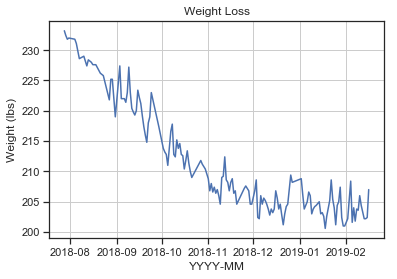

In [157]:
# quick check:
plt.plot(dfw1['Weight'])
plt.title('Weight Loss')
plt.ylabel("Weight (lbs)")
plt.xlabel("YYYY-MM")
plt.grid()
plt.show()

## 2. NUTRITION DATA

In [90]:
# import nutrition
os.chdir('/Users/artrodriguez/Desktop/all_projects/nutrition_and_activity/nutrition')
dfs = [pd.read_csv(f, header=None)
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]
finaldf = pd.concat(dfs, axis=0, join='inner').sort_index()

In [91]:
finaldf.sort_index(inplace=True, ascending=True)
finaldf.columns = finaldf.iloc[1]
finaldf.drop(finaldf.index[:29], inplace=True)
numeric_convert = ['Quantity',
                  'Calories',
                  'Fat (g)',
                  'Protein (g)',
                  'Carbohydrates (g)',
                  'Saturated Fat (g)',
                  'Sugars (g)',
                  'Fiber (g)',
                  'Cholesterol (mg)',
                  'Sodium (mg)'
                  ]
finaldf[numeric_convert] = finaldf[numeric_convert].apply(pd.to_numeric, errors='coerce')

In [92]:
# as datetime
finaldf['Date'] = pd.to_datetime(finaldf['Date'])
# set as index
finaldf.set_index(finaldf['Date'], inplace = True)
# drop Excess date columns
finaldf.drop(['Date'], axis=1, inplace=True)

In [93]:
finaldf.sort_index(inplace=True, ascending=True);

In [94]:
finaldf.drop(pd.Timestamp('2018-07-23'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-24'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-25'), inplace=True)
finaldf.drop(pd.Timestamp('2018-07-26'), inplace=True)

In [95]:
finaldf1 = finaldf.groupby([pd.Grouper(freq='D'), 'Type']).sum()
finaldf2 = finaldf1.unstack('Type')
finaldf2.drop('Quantity', axis=1, inplace=True)
finaldf2.fillna(0, inplace=True)
finaldf2.columns = [' '.join(col).strip() for col in finaldf2.columns.values]

In [96]:
finaldf2['Total Intake'] = finaldf2['Calories Afternoon Nosh'] + finaldf2['Calories Ale/Wine 1'] + finaldf2['Calories Breakfast'] + finaldf2['Calories Dessert'] + finaldf2['Calories Dinner'] + finaldf2['Calories Lunch'] + finaldf2['Calories Morning Nosh']
finaldf2['Net Calories'] = finaldf2['Total Intake'] - finaldf2['Calories Exercise']
finaldf2['Daily Fat (g)'] = finaldf2['Fat (g) Afternoon Nosh'] + finaldf2['Fat (g) Ale/Wine 1'] + finaldf2['Fat (g) Breakfast'] + finaldf2['Fat (g) Dessert'] + finaldf2['Fat (g) Dinner'] + finaldf2['Fat (g) Lunch'] + finaldf2['Fat (g) Morning Nosh']
finaldf2['Daily Protein (g)'] = finaldf2['Protein (g) Afternoon Nosh'] + finaldf2['Protein (g) Ale/Wine 1'] + finaldf2['Protein (g) Breakfast'] + finaldf2['Protein (g) Dessert'] + finaldf2['Protein (g) Dinner'] + finaldf2['Protein (g) Lunch'] + finaldf2['Protein (g) Morning Nosh']
finaldf2['Daily Carbohydrates (g)'] =finaldf2['Carbohydrates (g) Afternoon Nosh'] + finaldf2['Carbohydrates (g) Ale/Wine 1'] + finaldf2['Carbohydrates (g) Breakfast'] + finaldf2['Carbohydrates (g) Dessert'] + finaldf2['Carbohydrates (g) Dinner'] + finaldf2['Carbohydrates (g) Lunch'] + finaldf2['Carbohydrates (g) Morning Nosh']
finaldf2['Daily Saturated Fat (g)'] = finaldf2['Saturated Fat (g) Afternoon Nosh'] + finaldf2['Saturated Fat (g) Ale/Wine 1'] + finaldf2['Saturated Fat (g) Breakfast'] + finaldf2['Saturated Fat (g) Dessert'] + finaldf2['Saturated Fat (g) Dinner'] + finaldf2['Saturated Fat (g) Lunch'] + finaldf2['Saturated Fat (g) Morning Nosh']
finaldf2['Daily Sugar (g)'] = finaldf2['Sugars (g) Afternoon Nosh'] + finaldf2['Sugars (g) Ale/Wine 1'] + finaldf2['Sugars (g) Breakfast'] + finaldf2['Sugars (g) Dessert'] + finaldf2['Sugars (g) Dinner'] + finaldf2['Sugars (g) Lunch'] + finaldf2['Sugars (g) Morning Nosh']
finaldf2['Daily Fiber (g)'] = finaldf2['Fiber (g) Afternoon Nosh'] + finaldf2['Fiber (g) Ale/Wine 1'] + finaldf2['Fiber (g) Breakfast'] + finaldf2['Fiber (g) Dessert'] + finaldf2['Fiber (g) Dinner'] + finaldf2['Fiber (g) Lunch'] + finaldf2['Fiber (g) Morning Nosh']
finaldf2['Daily Cholesterol (mg)'] = finaldf2['Cholesterol (mg) Afternoon Nosh'] + finaldf2['Cholesterol (mg) Ale/Wine 1'] + finaldf2['Cholesterol (mg) Breakfast'] + finaldf2['Cholesterol (mg) Dessert'] + finaldf2['Cholesterol (mg) Dinner'] + finaldf2['Cholesterol (mg) Lunch'] + finaldf2['Cholesterol (mg) Morning Nosh']
finaldf2['Daily Sodium (mg)'] = finaldf2['Sodium (mg) Afternoon Nosh'] + finaldf2['Sodium (mg) Ale/Wine 1'] + finaldf2['Sodium (mg) Breakfast'] + finaldf2['Sodium (mg) Dessert'] + finaldf2['Sodium (mg) Dinner'] + finaldf2['Sodium (mg) Lunch'] + finaldf2['Sodium (mg) Morning Nosh']

In [97]:
finaldf2.drop(finaldf2.iloc[:, 8:72], inplace=True, axis=1);

In [98]:
df = pd.concat([finaldf2, dfw1], axis=1, sort=False)
df['Weight'].fillna(method='ffill', inplace=True)

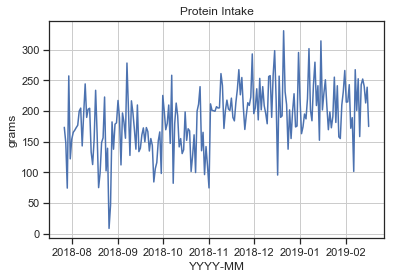

In [156]:
# quick check
plt.plot(df.index, df['Daily Protein (g)'])
plt.title('Protein Intake')
plt.ylabel('grams')
plt.xlabel('YYYY-MM')
#plt.text(0.5, 0.5, 'test')
plt.grid()
plt.show();

## 3. WORKOUT DATA
* Explore the following trends:
    * Time of day
    * Duration
    * Avg Heartrate

In [67]:
# import nutrition
import os
os.chdir('/Users/artrodriguez/Desktop/all_projects/nutrition_and_activity/workouts')
dfss = [pd.read_csv(f, header=None)
        for f in os.listdir(os.getcwd()) if f.endswith('csv')]
wkdfs = pd.concat(dfss, axis=0, join='inner').sort_index()

In [68]:
wkdfs.sort_index(inplace=True, ascending=True)
wkdfs.columns = wkdfs.iloc[1]
wkdfs.drop(wkdfs.index[0:3], inplace=True)

In [69]:
# as datetime
wkdfs['Date'] = pd.to_datetime(wkdfs['Start'])
# set as index
wkdfs.set_index(wkdfs['Date'], inplace = True)
# drop Excess date columns
cut = ['Start', 'Type', 'End', 'Distance', 'Max Heart Rate', 'Average Pace', 'Average Speed', 'Active Energy kcal', 'Total Energy kcal', 'Date']
wkdfs.drop(cut, axis=1, inplace=True)
#wkdfs.drop(['End'], axis=1, inplace=True)

In [70]:
wkdfs.sort_index(inplace=True, ascending=True);

In [71]:
wkdfs['Duration'] = wkdfs['Duration'].map(lambda x: str(x)[:-3])
#wkdfs.head()
y = wkdfs['Duration'].str.split(':')   
i, j = y.str[0], y.str[1]
wkdfs['Duration_float'] = (i.astype(int) + (j.astype(float) / 60).round(1))
wkdfs.drop(['Duration'], axis=1, inplace=True)

In [72]:
wkdfs['Average Heart Rate'] = wkdfs['Average Heart Rate'].apply(pd.to_numeric, errors='coerce').round(0)

In [73]:
wkdfs['Average Heart Rate'].dropna(how='all',
                                   inplace=True)

In [74]:
wkdfs1 = wkdfs[~wkdfs.isin(['NaN']).any(axis=1)]

In [75]:
wkdfs2 = wkdfs1[wkdfs1['Duration_float'] > 0.2]

In [76]:
wkdfs3 = wkdfs2[wkdfs2['Duration_float'] < 2.5]

In [77]:
wkdfs4 = wkdfs3.copy()
wkdfs4['start_hour'] = wkdfs3.index.hour

In [78]:
wkdfs4['trial'] = wkdfs4.index.strftime('%Y-%m-%d')
# as datetime
wkdfs4['Date1'] = pd.to_datetime(wkdfs4['trial'])
# set as index
wkdfs4.set_index(wkdfs4['Date1'], inplace = True)
# drop Excess date columns
cut1 = ['trial', 'Date1']
wkdfs4.drop(cut1, axis=1, inplace=True)

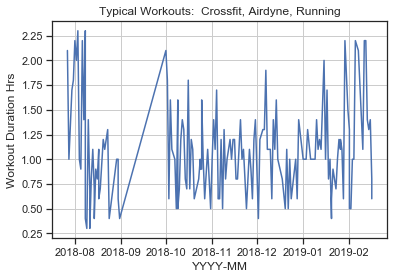

In [160]:
plt.plot(wkdfs4.index, wkdfs4['Duration_float'])
plt.title('Typical Workouts:  Crossfit, Airdyne, Running')
plt.ylabel('Workout Duration Hrs')
plt.xlabel('YYYY-MM')
plt.grid()
plt.show()

## 4. SLEEP DATA

In [114]:
os.chdir('/Users/artrodriguez/Desktop/all_projects/nutrition_and_activity/')

In [115]:
dfsleep = pd.read_csv('SleepAnalysis.csv')
dfsleep_c = dfsleep.iloc[:,0:3]

In [116]:
dfsleep_c['In bed start'] = pd.to_datetime(dfsleep_c['In bed start'])
dfsleep_c['In bed Finish'] = pd.to_datetime(dfsleep_c['In bed Finish'])

In [117]:
dfsleep_c['hrs_of_sleep'] = (dfsleep_c['Minutes in bed']/60).round(1)

In [118]:
dfsleep_cc = dfsleep_c.set_index(dfsleep_c['In bed Finish']);

In [119]:
dfsleep_cc['trial1'] = dfsleep_cc.index.strftime('%Y-%m-%d')
#wkdfs4.info()
# as datetime

dfsleep_cc['Date11'] = pd.to_datetime(dfsleep_cc['trial1'])
# set as index
dfsleep_cc.set_index(dfsleep_cc['Date11'], inplace = True)
# drop Excess date columns
cut11 = ['trial1', 'Date11', 'In bed start', 'In bed Finish', 'Minutes in bed']
dfsleep_cc.drop(cut11, axis=1, inplace=True)
dfsleep_cc.head();

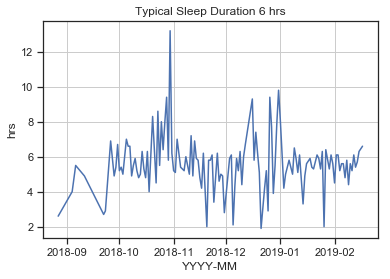

In [162]:
# quick check
plt.plot(dfsleep_cc['hrs_of_sleep'])
plt.title('Typical Sleep Duration 6 hrs')
plt.ylabel('hrs')
plt.xlabel('YYYY-MM')
plt.grid()
plt.show()

## PLOTS

In [121]:
wkdfs5 = wkdfs4.groupby(wkdfs4.index).mean();

In [122]:
dfx = pd.concat([df, wkdfs5], axis=1, sort=False)

In [123]:
dfxy = pd.concat([dfx, dfsleep_cc], axis=1, sort=False)

In [124]:
dfxy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 206 entries, 2018-07-27 to 2019-02-17
Data columns (total 23 columns):
Calories Afternoon Nosh    205 non-null float64
Calories Ale/Wine 1        205 non-null float64
Calories Breakfast         205 non-null float64
Calories Dessert           205 non-null float64
Calories Dinner            205 non-null float64
Calories Exercise          205 non-null float64
Calories Lunch             205 non-null float64
Calories Morning Nosh      205 non-null float64
Total Intake               205 non-null float64
Net Calories               205 non-null float64
Daily Fat (g)              205 non-null float64
Daily Protein (g)          205 non-null float64
Daily Carbohydrates (g)    205 non-null float64
Daily Saturated Fat (g)    205 non-null float64
Daily Sugar (g)            205 non-null float64
Daily Fiber (g)            205 non-null float64
Daily Cholesterol (mg)     205 non-null float64
Daily Sodium (mg)          205 non-null float64
Weight      

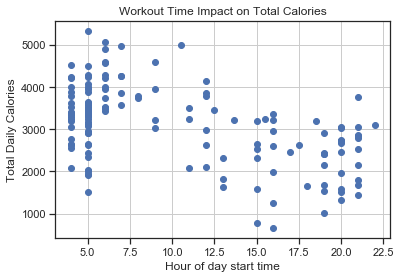

In [176]:
plt.scatter(dfxy['start_hour'], dfxy['Total Intake'])
plt.title('Workout Time Impact on Total Calories')
plt.ylabel('Total Daily Calories')
plt.xlabel('Hour of day start time')
plt.grid()
plt.show()

## FINAL PLOTS

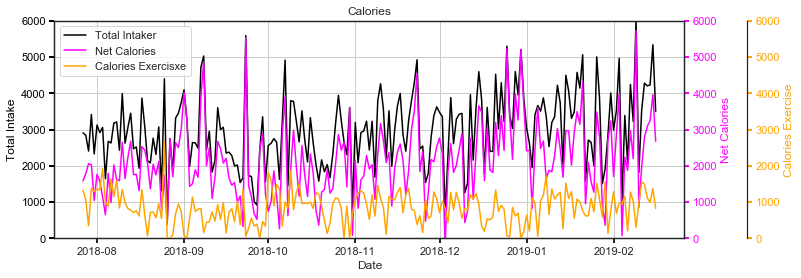

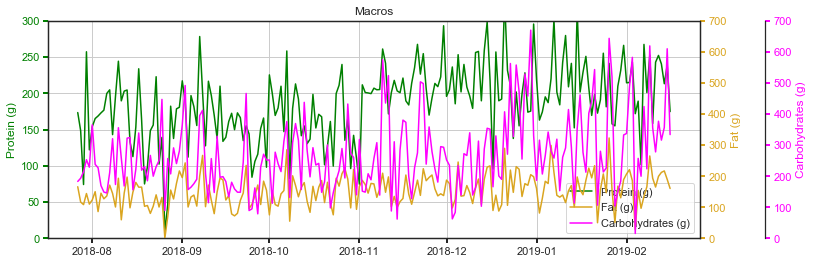

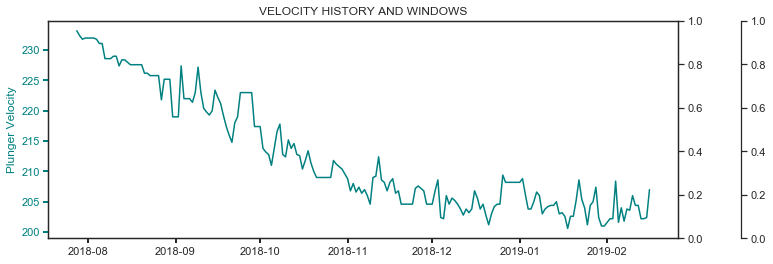

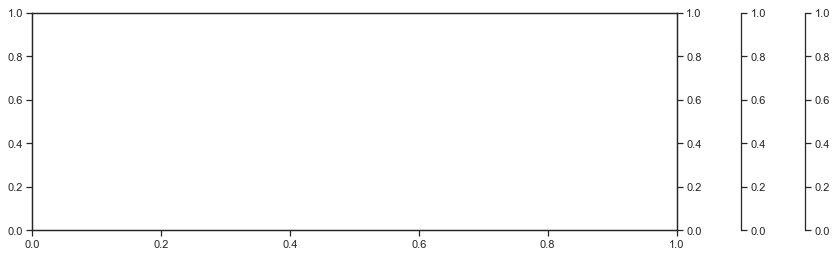

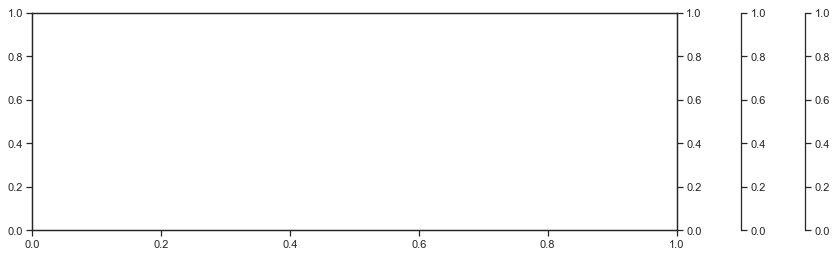

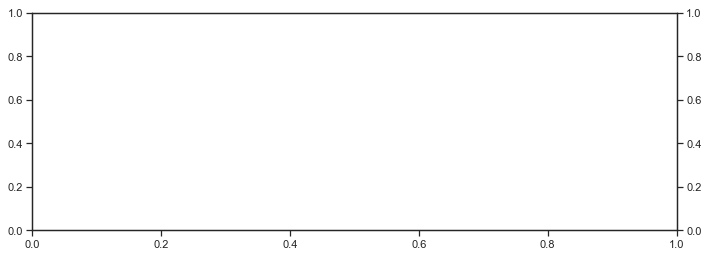

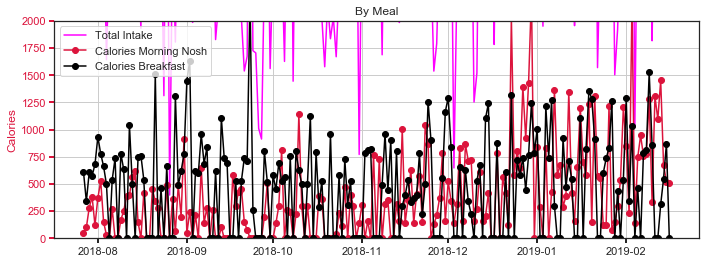

In [178]:
# match above
#xmin='2019-01-31 11:10:00.000000' # 2 day
#xmax='2019-01-31 22:59:00.000000' # 12 hr

### DEFINE SPINES

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

### ADD PLOTS
        
fig, ax1 = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=1)
fig, ax2 = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=1.03)
fig, ax3 = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=1)
fig, ax4 = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=1.02)
fig, ax5 = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=1.02)
fig, ax6 = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=1.02)
fig, ax7 = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=1.02)


### ADD CURVES > 1

par1_1 = ax1.twinx()
par2_1 = ax1.twinx()
#par3_1 = ax1.twinx()

par1_2 = ax2.twinx()
par2_2 = ax2.twinx()

par1_3 = ax3.twinx()
par2_3 = ax3.twinx()

par1_4 = ax4.twinx()
par2_4 = ax4.twinx()
par3_4 = ax4.twinx()

par1_5 = ax5.twinx()
par2_5 = ax5.twinx()
par3_5 = ax5.twinx()

par1_6 = ax6.twinx()

### PART 1
par2_1.spines["right"].set_position(("axes", 1.1))
par2_2.spines['right'].set_position(('axes', 1.1))
par2_3.spines['right'].set_position(('axes', 1.1))
par2_4.spines['right'].set_position(('axes', 1.1))
par2_5.spines['right'].set_position(('axes', 1.1))
### PART 2
make_patch_spines_invisible(par2_1)
make_patch_spines_invisible(par2_2)
make_patch_spines_invisible(par2_3)
make_patch_spines_invisible(par2_4)
make_patch_spines_invisible(par2_5)
### PART 3
par2_1.spines["right"].set_visible(True)
par2_2.spines["right"].set_visible(True)
par2_3.spines["right"].set_visible(True)
par2_4.spines["right"].set_visible(True)
par2_5.spines["right"].set_visible(True)

### part 1
par3_1.spines["right"].set_position(("axes", 1.2))
par3_4.spines["right"].set_position(("axes", 1.2))
par3_5.spines["right"].set_position(("axes", 1.2))
### part 2
make_patch_spines_invisible(par3_1)
make_patch_spines_invisible(par3_4)
make_patch_spines_invisible(par3_5)
### PART 3
par3_1.spines["right"].set_visible(True)
par3_4.spines["right"].set_visible(True)
par3_5.spines["right"].set_visible(True)

##############
### PLOT 1 ###
##############

p1_1, = ax1.plot(dfxy['Total Intake'], color='black', label="Total Intaker")
p2_1, = par1_1.plot(dfxy['Net Calories'], color='magenta', label="Net Calories")
p3_1, = par2_1.plot(dfxy['Calories Exercise'], color='orange', label="Calories Exercisxe")
#p4_1, = par3_1.plot(finaldf2['Line Pressure (PSIG)'], color='grey', label="LP")

#ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0, 6000)
par1_1.set_ylim(0, 6000)
par2_1.set_ylim(0, 6000)
#par3_1.set_ylim(0, 400)

ax1.set_xlabel("Date")
ax1.set_ylabel("Total Intake")
par1_1.set_ylabel("Net Calories")
par2_1.set_ylabel("Calories Exercise")
#par3_1.set_ylabel('LP')

ax1.yaxis.label.set_color(p1_1.get_color())
par1_1.yaxis.label.set_color(p2_1.get_color())
par2_1.yaxis.label.set_color(p3_1.get_color())
#par3_1.yaxis.label.set_color(p4_1.get_color())

tkw = dict(size=5, width=2)
ax1.tick_params(axis='y', colors=p1_1.get_color(), **tkw)
par1_1.tick_params(axis='y', colors=p2_1.get_color(), **tkw)
par2_1.tick_params(axis='y', colors=p3_1.get_color(), **tkw)
#par3_1.tick_params(axis='y', colors=p4_1.get_color(), **tkw)
ax1.tick_params(axis='x', **tkw)

lines_1 = [p1_1, p2_1, p3_1] #, p4_1]
ax1.legend(lines_1, [l.get_label() for l in lines_1])

ax1.grid()
ax1.set_title('Calories')

##############
### PLOT 2 ###
##############

p1_2, = ax2.plot(dfxy['Daily Protein (g)'], color='green', label="Protein (g)")
p2_2, = par1_2.plot(dfxy['Daily Fat (g)'], color='goldenrod', label="Fat (g)")
p3_2, = par2_2.plot(dfxy['Daily Carbohydrates (g)'], color='magenta', label='Carbohydrates (g)')

#ax2.set_xlim(xmin, xmax)
ax2.set_ylim(0, 300)
par1_2.set_ylim(0, 700)
par2_2.set_ylim(0, 700)

ax2.set_ylabel("Protein (g)")
par1_2.set_ylabel("Fat (g)")
par2_2.set_ylabel("Carbohydrates (g)")

ax2.xaxis.set_visible(True)

ax2.yaxis.label.set_color(p1_2.get_color())
par1_2.yaxis.label.set_color(p2_2.get_color())
par2_2.yaxis.label.set_color(p3_2.get_color())

tkw = dict(size=5, width=2)
ax2.tick_params(axis='y', colors=p1_2.get_color(), **tkw)
par1_2.tick_params(axis='y', colors=p2_2.get_color(), **tkw)
par2_2.tick_params(axis='y', colors=p3_2.get_color(), **tkw)
ax2.tick_params(axis='x', **tkw)

lines_2 = [p1_2, p2_2, p3_2]

ax2.legend(lines_2, [l.get_label() for l in lines_2])
ax2.grid()
ax2.set_title('Macros')


##############
### PLOT 3 ###
##############

p1_3, = ax3.plot(dfxy['Weight'], color='teal', label="PV1",)
#p2_3, = par1_3.plot(df['FV'], color='goldenrod', label="FV")
#p3_3, = par2_3.plot(df['SV'], color='magenta', label='SV')

#ax3.set_xlim(xmin, xmax)
#ax3.set_ylim(0, 2000)
#par1_3.set_ylim(0, 2000)
#par2_3.set_ylim(0, 2000)

ax3.set_ylabel("Plunger Velocity")
#par1_3.set_ylabel("Fast Velocity")
#par2_3.set_ylabel("Slow Velocity")

ax3.xaxis.set_visible(True)


ax3.yaxis.label.set_color(p1_3.get_color())
#par1_3.yaxis.label.set_color(p2_3.get_color())
#par2_3.yaxis.label.set_color(p3_3.get_color())

tkw = dict(size=5, width=2)
ax3.tick_params(axis='y', colors=p1_3.get_color(), **tkw)
#par1_3.tick_params(axis='y', colors=p2_3.get_color(), **tkw)
#par2_3.tick_params(axis='y', colors=p3_3.get_color(), **tkw)
ax3.tick_params(axis='x', **tkw)

#lines_3 = [p1_3, p2_3, p3_3]

#ax3.legend(lines_3, [l.get_label() for l in lines_3])

ax3.set_title('VELOCITY HISTORY AND WINDOWS')

"""

### PLOT 4

p1_4, = ax4.plot(df['Historic Fast Arrivals (COUNT)'], color='goldenrod', label="Fast")
p2_4, = par1_4.plot(df['Historic Good Arrivals (COUNT)'], color='blue', label="Good")
p3_4, = par2_4.plot(df['Historic Slow Arrivals (COUNT)'], color='violet', label='Slow')
p4_4, = par3_4.plot(df['Historic No Arrivals (COUNT)'], color='black', label='NoArr')

ax4.set_xlim(xmin, xmax)
ax4.set_ylim(0, 50)
par1_4.set_ylim(0, 50)
par2_4.set_ylim(0, 50)
par3_4.set_ylim(0, 50)

ax4.set_ylabel("Fast")
par1_4.set_ylabel("Good")
par2_4.set_ylabel("Slow")
par3_4.set_ylabel("NoArr")

ax4.xaxis.set_visible(True)


ax4.yaxis.label.set_color(p1_4.get_color())
par1_4.yaxis.label.set_color(p2_4.get_color())
par2_4.yaxis.label.set_color(p3_4.get_color())
par3_4.yaxis.label.set_color(p4_4.get_color())

tkw = dict(size=5, width=2)
ax4.tick_params(axis='y', colors=p1_4.get_color(), **tkw)
par1_4.tick_params(axis='y', colors=p2_4.get_color(), **tkw)
par2_4.tick_params(axis='y', colors=p3_4.get_color(), **tkw)
par3_4.tick_params(axis='y', colors=p4_4.get_color(), **tkw)
ax4.tick_params(axis='x', **tkw)

lines_4 = [p1_4, p2_4, p3_4, p4_4]

ax4.legend(lines_4, [l.get_label() for l in lines_4])

ax4.set_title('COUNTERS')


### PLOT 5

p1_5, = ax5.plot(df['AF'], color='chocolate', label="AF") #marker='o', markersize=2, markerfacecolor='black')
p2_5, = par1_5.plot(df['OT'], color='indigo', label="OffTime")
p3_5, = par2_5.plot(df['max_ot'], color='gray', label='MaxOff', linestyle='-')
p4_5, = par3_5.plot(df['min_ot'], color='gray', label='MinOff', linestyle='-')

ax5.set_xlim(xmin, xmax)
ax5.set_ylim(0, 8, 2)
par1_5.set_ylim(0, 8)
par2_5.set_ylim(0, 8)
par3_5.set_ylim(0, 8)

ax5.set_ylabel("AF")
par1_5.set_ylabel("OFF")
par2_5.set_ylabel("Max Off")
par3_5.set_ylabel("Min Off")

ax5.xaxis.set_visible(True)


ax5.yaxis.label.set_color(p1_5.get_color())
par1_5.yaxis.label.set_color(p2_5.get_color())
par2_5.yaxis.label.set_color(p3_5.get_color())
par3_5.yaxis.label.set_color(p4_5.get_color())

tkw = dict(size=5, width=2)
ax5.tick_params(axis='y', colors=p1_5.get_color(), **tkw)
par1_5.tick_params(axis='y', colors=p2_5.get_color(), **tkw)
par2_5.tick_params(axis='y', colors=p3_5.get_color(), **tkw)
par3_5.tick_params(axis='y', colors=p4_5.get_color(), **tkw)
ax5.tick_params(axis='x', **tkw)

lines_5 = [p1_5, p2_5, p3_5, p4_5]

ax5.legend(lines_5, [l.get_label() for l in lines_5])

ax5.set_title('TIMER SETPOINTS')


### PLOT 6
#change C_Gas_RA to Rate_RA to C_Gas_pc

p1_6, = ax6.plot(df['C_Gas'], color='crimson', label="Cum Gas")
p2_6, = par1_6.plot(df['C_Gas_6hr'], color='gray', label="6 Hr Slope")

ax6.set_xlim(xmin, xmax)
ax6.set_ylim(0, 2000)
par1_6.set_ylim(0, 500)

ax6.set_ylabel("Cum Gas")
par1_6.set_ylabel("Slope")

ax6.xaxis.set_visible(True)

ax6.yaxis.label.set_color(p1_6.get_color())
par1_6.yaxis.label.set_color(p2_6.get_color())


tkw = dict(size=5, width=2)
ax6.tick_params(axis='y', colors=p1_6.get_color(), **tkw)
par1_6.tick_params(axis='y', colors=p2_6.get_color(), **tkw)
ax6.tick_params(axis='x', **tkw)

lines_6 = [p1_6, p2_6]

ax6.legend(lines_6, [l.get_label() for l in lines_6])

ax6.set_title('PERFORMANCE METRICS')

###

"""

### PLOT 7

p0_7, = ax7.plot(dfxy['Total Intake'], color='magenta', label='Total Intake')
p1_7, = ax7.plot(df['Calories Morning Nosh'], color='crimson', label="Calories Morning Nosh", marker='o', linestyle='-')
p2_7, = ax7.plot(df['Calories Breakfast'], color='black', label='Calories Breakfast', marker='o', linestyle='-')
#p3_7, = ax7.plot(df['Calories Lunch'], color='gray', label='Calories Breakfast')
#p4_7, = ax7.plot(df['Calories Afternoon Nosh'], color='blue', label='Calories Breakfast')
#p5_7, = ax7.plot(df['Calories Dinner'], color='orange', label='Calories Breakfast')
#p6_7, = ax7.plot(df['Calories Dessert'], color='goldenrod', label='Calories Breakfast')
#p7_7, = ax7.plot(df['Calories Ale/Wine 1'], color='yellow', label='Calories Breakfast')

#ax7.set_xlim(xmin, xmax)
ax7.set_ylim(0, 2000)


ax7.set_ylabel("Calories")


ax7.xaxis.set_visible(True)

ax7.yaxis.label.set_color(p1_7.get_color())


tkw = dict(size=5, width=2)
ax7.tick_params(axis='y', colors=p1_7.get_color(), **tkw)
ax7.tick_params(axis='x', **tkw)

lines_7 = [p0_7, p1_7, p2_7]

ax7.legend(lines_7, [l.get_label() for l in lines_7])
ax7.grid()
ax7.set_title('By Meal')


###


#plt.style.use('grayscale')



plt.show()